In [1]:
import yfinance as yf
import datetime

In [2]:
ticker = "ORCL"
start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 12, 31)
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,53.270000,53.959999,53.230000,53.950001,50.055771,13899600
2020-01-03,52.990002,54.049999,52.950001,53.759998,49.879498,11026700
2020-01-06,53.360001,54.200001,53.349998,54.040001,50.139286,10982400
2020-01-07,53.889999,54.330002,53.610001,54.160000,50.250618,12015400
2020-01-08,53.939999,54.599998,53.700001,54.130001,50.446327,11856700
...,...,...,...,...,...,...
2020-12-23,65.260002,66.199997,65.150002,65.300003,61.652424,13075200
2020-12-24,65.050003,65.589996,64.779999,64.959999,61.331421,3796500
2020-12-28,65.410004,65.690002,64.750000,64.870003,61.246445,6463500


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,53.270000,53.959999,53.230000,53.950001,50.055771,13899600
2020-01-03,52.990002,54.049999,52.950001,53.759998,49.879498,11026700
2020-01-06,53.360001,54.200001,53.349998,54.040001,50.139286,10982400
2020-01-07,53.889999,54.330002,53.610001,54.160000,50.250618,12015400
2020-01-08,53.939999,54.599998,53.700001,54.130001,50.446327,11856700


In [5]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.985558,0.991263,0.975924,0.976221,-0.222267
High,0.985558,1.000000,0.980557,0.984544,0.985612,-0.145396
Low,0.991263,0.980557,1.000000,0.986948,0.986028,-0.263917
Close,0.975924,0.984544,0.986948,1.000000,0.999011,-0.211293
Adj Close,0.976221,0.985612,0.986028,0.999011,1.000000,-0.208940
Volume,-0.222267,-0.145396,-0.263917,-0.211293,-0.208940,1.000000


In [6]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.985558,0.991263,0.975924,0.976221,-0.222267
High,0.985558,1.000000,0.980557,0.984544,0.985612,-0.145396
Low,0.991263,0.980557,1.000000,0.986948,0.986028,-0.263917
Close,0.975924,0.984544,0.986948,1.000000,0.999011,-0.211293
Adj Close,0.976221,0.985612,0.986028,0.999011,1.000000,-0.208940
Volume,-0.222267,-0.145396,-0.263917,-0.211293,-0.208940,1.000000


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ORCL Open Price')

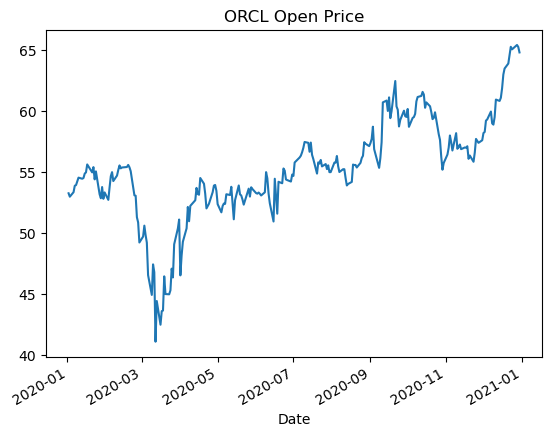

In [8]:
feature='Open'
data[feature].plot()
plt.title(f'{ticker} {feature} Price')

Text(0.5, 1.0, 'ORCL High Price')

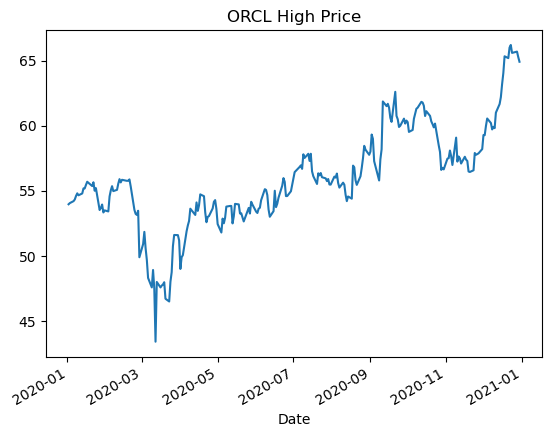

In [9]:
feature='High'
data[feature].plot()
plt.title(f'{ticker} {feature} Price')

Text(0.5, 1.0, 'ORCL Low Price')

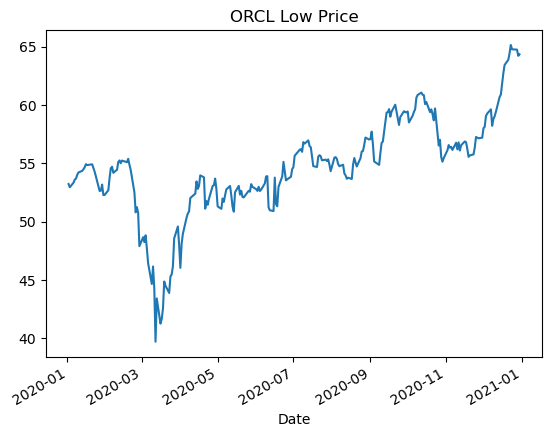

In [10]:
feature='Low'
data[feature].plot()
plt.title(f'{ticker} {feature} Price')

Text(0.5, 1.0, 'ORCL Close Price')

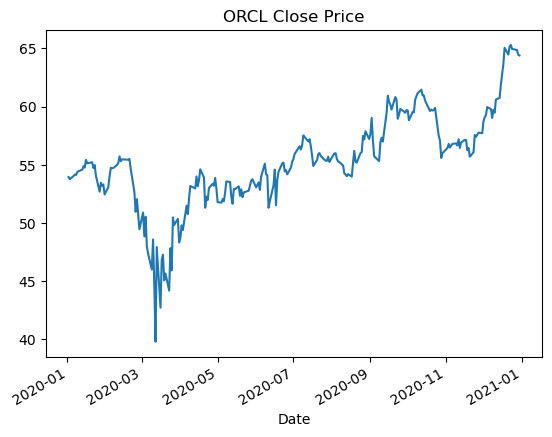

In [11]:
feature='Close'
data[feature].plot()
plt.title(f'{ticker} {feature} Price')

Text(0.5, 1.0, 'ORCL Adj Close Price')

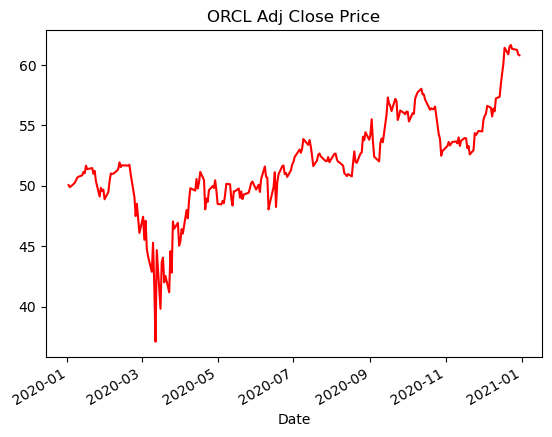

In [12]:
feature='Adj Close'
data[feature].plot(color='red')
plt.title(f'{ticker} {feature} Price')

Text(0.5, 1.0, 'ORCL Volume Price')

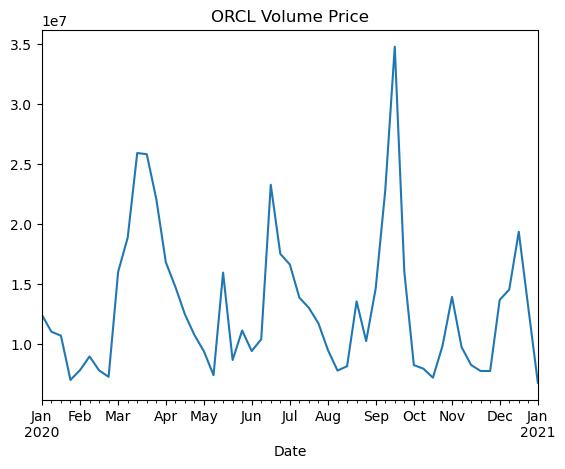

In [13]:
feature='Volume'
data[feature].resample('W').mean().plot()
plt.title(f'{ticker} {feature} Price')

# Dimensionality Reduction

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler

In [15]:
def create_stacked_autoencoder(input_dim, hidden_dims):
    
    input_layer = Input(shape=(input_dim,))
    
    encoded = input_layer
    for hidden_dim in hidden_dims:
        encoded = Dense(hidden_dim, activation='elu')(encoded)
    
    decoded = encoded
    for hidden_dim in reversed(hidden_dims[:-1]):
        decoded = Dense(hidden_dim, activation='elu')(decoded)
    
    output_layer = Dense(input_dim, activation='elu')(decoded)
    
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    
    optimizer = Adam(lr=0.01)  
    autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return autoencoder


In [16]:
input_dim = 6 
hidden_dims = [100,80,20,1] 
epochs = 200  
batch_size = 64

In [17]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

In [18]:
autoencoder = create_stacked_autoencoder(input_dim, hidden_dims)

In [19]:
history=autoencoder.fit(data_scaled, data_scaled, epochs=100, batch_size=batch_size, shuffle=True)

Epoch 1/100



4/4 [==============================] - 4s 10ms/step - loss: 0.8876
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5617
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4219
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4139
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4161
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3945
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3707
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.3475
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.3370
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.3206
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3057
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2954
Epoch 13/100
4/4 [==============================] - 0s 11ms/step -

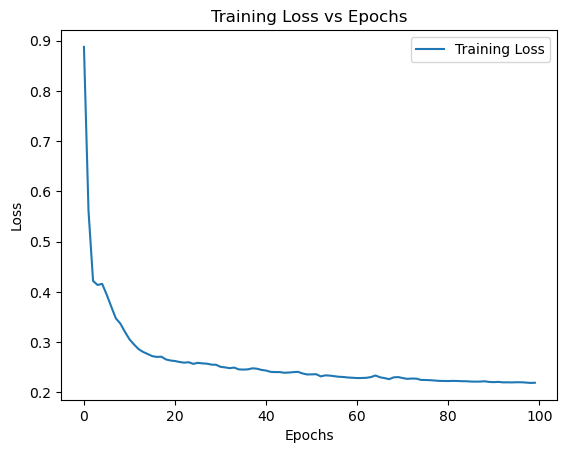

In [20]:
plt.plot(history.epoch, history.history['loss'], label="Training Loss")


plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

In [21]:
predicted=autoencoder.predict(data_scaled)

8/8 [==============================] - 0s 5ms/step


In [22]:
predicted_true=scaler.inverse_transform(predicted)

<Axes: xlabel='Date'>

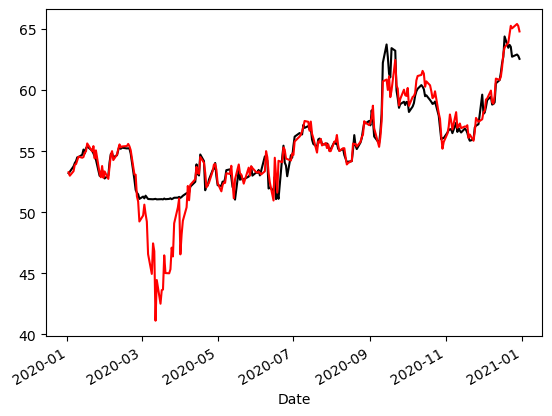

In [23]:
predicted_true=pd.DataFrame(predicted_true)
predicted_true.index=data.index
predicted_true.iloc[:,0].plot(color='black')
data.iloc[:,0].plot(color='red')

In [24]:
predicted_true

,0,1,2,3,4,5
Date,,,,,,
2020-01-02,53.195179,53.746685,52.648308,53.247875,49.793598,10123061.0
2020-01-03,53.316040,53.855793,52.780334,53.364872,49.908749,10097816.0
2020-01-06,53.752377,54.255615,53.255329,53.787273,50.326885,10048131.0
2020-01-07,54.026093,54.510586,53.551731,54.052193,50.591080,10041576.0
2020-01-08,54.185894,54.660774,53.724255,54.206825,50.746040,10044389.0
...,...,...,...,...,...,...
2020-12-23,63.540527,64.405975,62.733891,63.511936,59.864952,21534172.0
2020-12-24,62.728065,63.535866,61.987526,62.683044,59.106663,19492234.0
2020-12-28,62.909515,63.729710,62.154507,62.867939,59.276772,19929966.0


In [25]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,53.270000,53.959999,53.230000,53.950001,50.055771,13899600
2020-01-03,52.990002,54.049999,52.950001,53.759998,49.879498,11026700
2020-01-06,53.360001,54.200001,53.349998,54.040001,50.139286,10982400
2020-01-07,53.889999,54.330002,53.610001,54.160000,50.250618,12015400
2020-01-08,53.939999,54.599998,53.700001,54.130001,50.446327,11856700
...,...,...,...,...,...,...
2020-12-23,65.260002,66.199997,65.150002,65.300003,61.652424,13075200
2020-12-24,65.050003,65.589996,64.779999,64.959999,61.331421,3796500
2020-12-28,65.410004,65.690002,64.750000,64.870003,61.246445,6463500


In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data.iloc[:,0], predicted_true.iloc[:,0])
print("Mean Squared Error:", mse)

Mean Squared Error: 3.0652627704292836


In [27]:
encoder = Model(autoencoder.input, autoencoder.layers[len(hidden_dims)].output)
encoded = encoder.predict(data_scaled)

8/8 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'ORCL- dimensionality reduced feature through Autoencoder')

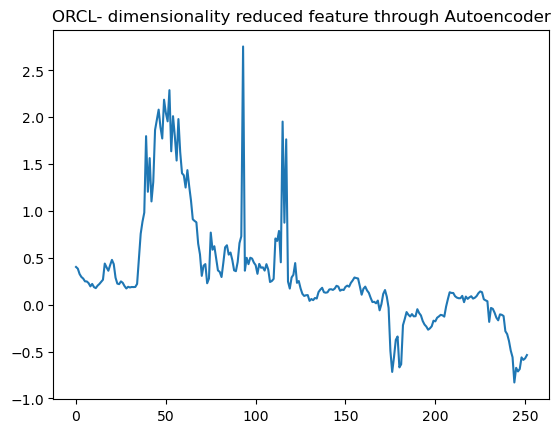

In [28]:
plt.plot(encoded)
plt.title(f'{ticker}- dimensionality reduced feature through Autoencoder')

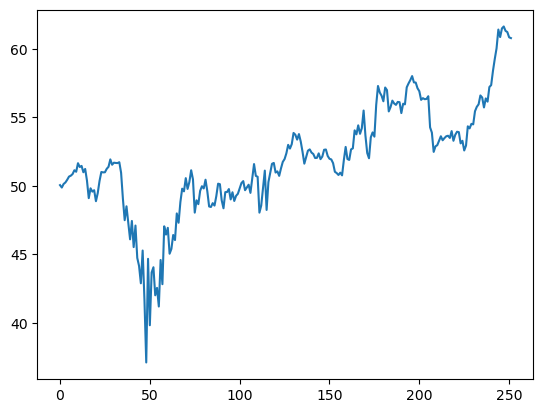

In [29]:
plt.plot(np.array(data['Adj Close']))

# Kernel PCA-based Dimensionality reduction

In [30]:
from sklearn.decomposition import KernelPCA

In [31]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [32]:
kpca = KernelPCA(n_components=1, kernel='cosine', gamma=15)

In [33]:
data_reduced = kpca.fit_transform(data_scaled)

In [34]:
data_reduced=pd.DataFrame(data_reduced)

Text(0.5, 1.0, 'ORCL- dimensionality reduced feature through KPCA')

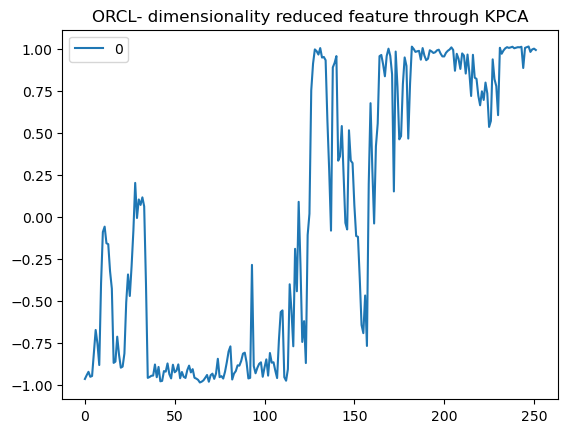

In [35]:
data_reduced.plot()
plt.title(f'{ticker}- dimensionality reduced feature through KPCA')

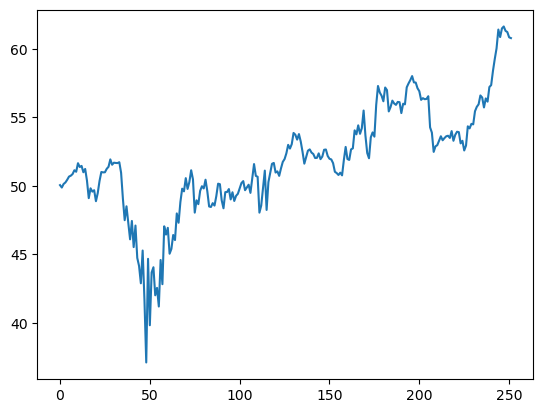

In [36]:
plt.plot(np.array(data['Adj Close']))

# UMAP 

Text(0.5, 1.0, 'ORCL- dimensionality reduced feature through UMAP')

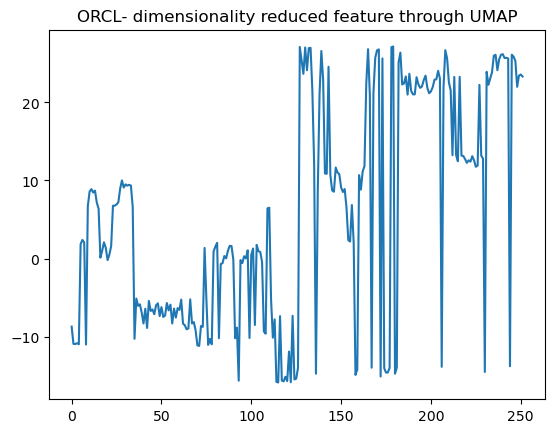

In [37]:
import umap
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

reducer = umap.UMAP(n_components=1,n_neighbors=10, min_dist=0.1, metric='cosine')
reduced_umap = reducer.fit_transform(data_scaled)

plt.plot(range(0,data_scaled.shape[0]),pd.DataFrame(reduced_umap).iloc[:,0])
#pd.DataFrame(reduced_umap).plot()
plt.title(f'{ticker}- dimensionality reduced feature through UMAP')

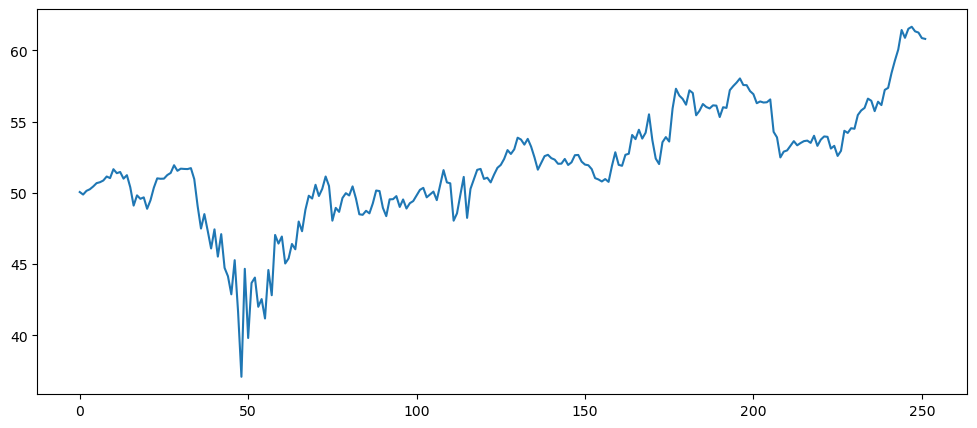

In [38]:
plt.figure(figsize=(12,5))
plt.plot(np.array(data['Adj Close']))

# PCA

In [39]:
from sklearn.decomposition import PCA

In [40]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

In [41]:
pca = PCA(n_components=1)

In [42]:
data_pca_reduced=pca.fit_transform(data_scaled)

In [43]:
data_pca_reduced=pd.DataFrame(data_pca_reduced)

Text(0.5, 1.0, 'ORCL- dimensionality reduced feature through PCA')

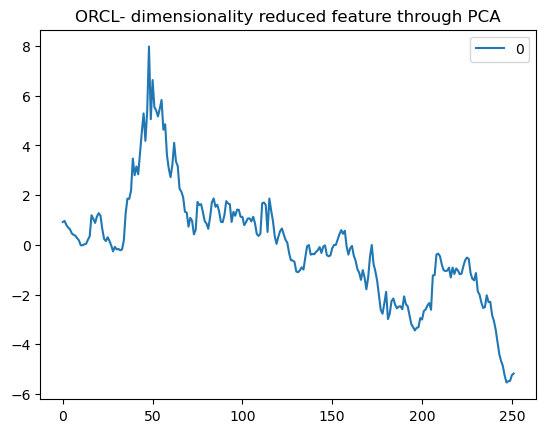

In [44]:
data_pca_reduced.plot()
plt.title(f'{ticker}- dimensionality reduced feature through PCA')

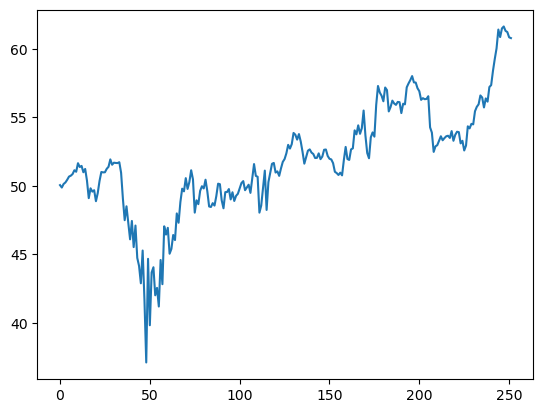

In [45]:
plt.plot(np.array(data['Adj Close']))

In [46]:
data_reconstructed=scaler.inverse_transform(pca.inverse_transform(data_pca_reduced))

In [47]:
data_reconstructed=pd.DataFrame(data_reconstructed)
data_reconstructed.index=data.index

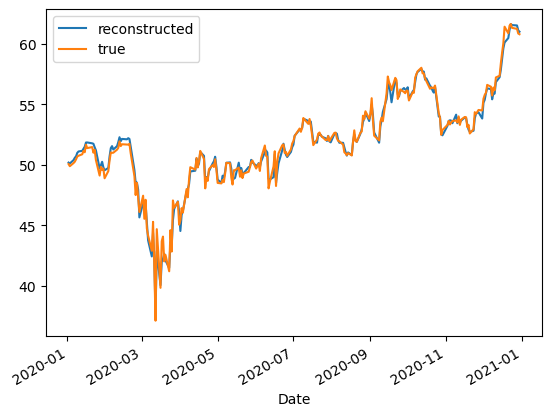

In [48]:
data_reconstructed.iloc[:,4].plot(label='reconstructed')
data.iloc[:,4].plot(label='true')
plt.legend()

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data.iloc[:,2], data_reconstructed.iloc[:,2])
print("Mean Squared Error:", mse)

Mean Squared Error: 0.13362932930130378


# TSNE

In [50]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [51]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [52]:
tsne = TSNE(n_components=1, random_state=42)

In [53]:
data_tsne_reduced = tsne.fit_transform(data_scaled)

In [54]:
data_tsne_reduced=pd.DataFrame(data_tsne_reduced)

In [55]:
data_tsne_reduced

,0
0,7.880465
1,9.277158
2,7.615551
3,7.198294
4,6.920992
...,...
247,-21.481340
248,-21.690187
249,-21.634638
250,-21.579193


Text(0.5, 1.0, 'ORCL- dimensionality reduced feature through tSNE')

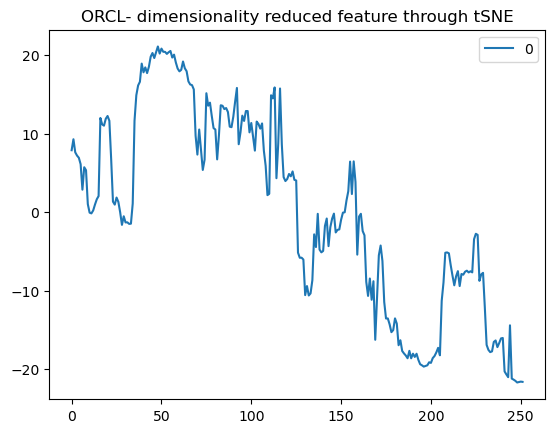

In [56]:
data_tsne_reduced.plot()
plt.title(f'{ticker}- dimensionality reduced feature through tSNE')

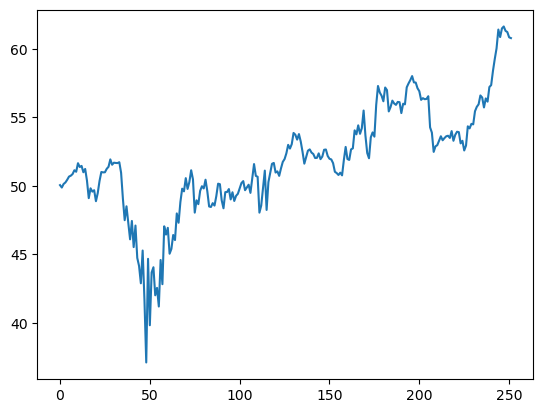

In [57]:
plt.plot(np.array(data['Adj Close']))

<Axes: xlabel='Date'>

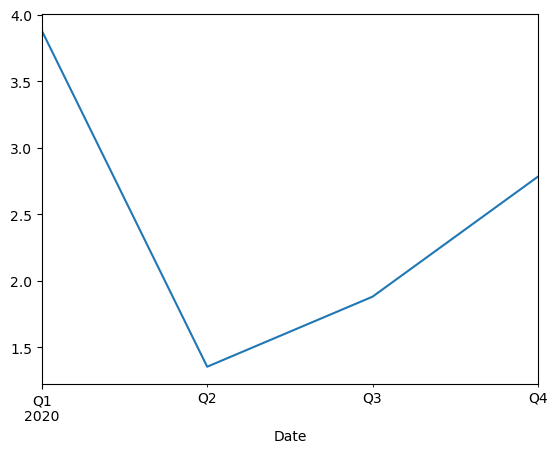

In [58]:
data.Close.resample('Q').std().plot()